In [1]:
# decision tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

data_raw = pd.read_csv(r"c:\Users\bobbe\OneDrive\Desktop\usb\mydata2.csv")

print("Raw Data:")
print(data_raw.head())

data_raw['native-country'].fillna('Unknown', inplace=True)
label_encoder = LabelEncoder()
data_raw['marital-status_encoded'] = label_encoder.fit_transform(data_raw['marital-status'])
data_raw['sex_encoded'] = label_encoder.fit_transform(data_raw['sex'])
data_raw['native-country_encoded'] = label_encoder.fit_transform(data_raw['native-country'])
data_raw['agrossincome_encoded'] = label_encoder.fit_transform(data_raw['agrossincome'])

print("\nEncoded Data:")
print(data_raw.head())

X = data_raw[['age', 'education-num', 'marital-status_encoded', 'hours-per-week', 'sex_encoded', 'native-country_encoded']]
y = data_raw['agrossincome_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

#  accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Raw Data:
   age  education-num       marital-status    sex  hours-per-week  \
0   49              9   Married-civ-spouse   Male              40   
1   23             12        Never-married   Male              52   
2   20             10        Never-married   Male              44   
3   45             13             Divorced   Male              40   
4   30             10   Married-civ-spouse   Male              40   

   native-country agrossincome  
0   United-States        <=50K  
1   United-States        <=50K  
2   United-States        <=50K  
3   United-States        <=50K  
4   United-States        <=50K  

Encoded Data:
   age  education-num       marital-status    sex  hours-per-week  \
0   49              9   Married-civ-spouse   Male              40   
1   23             12        Never-married   Male              52   
2   20             10        Never-married   Male              44   
3   45             13             Divorced   Male              40   
4   30           

C:\Users\bobbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster Distribution:
cluster
0    181
2     87
1     74
Name: count, dtype: int64


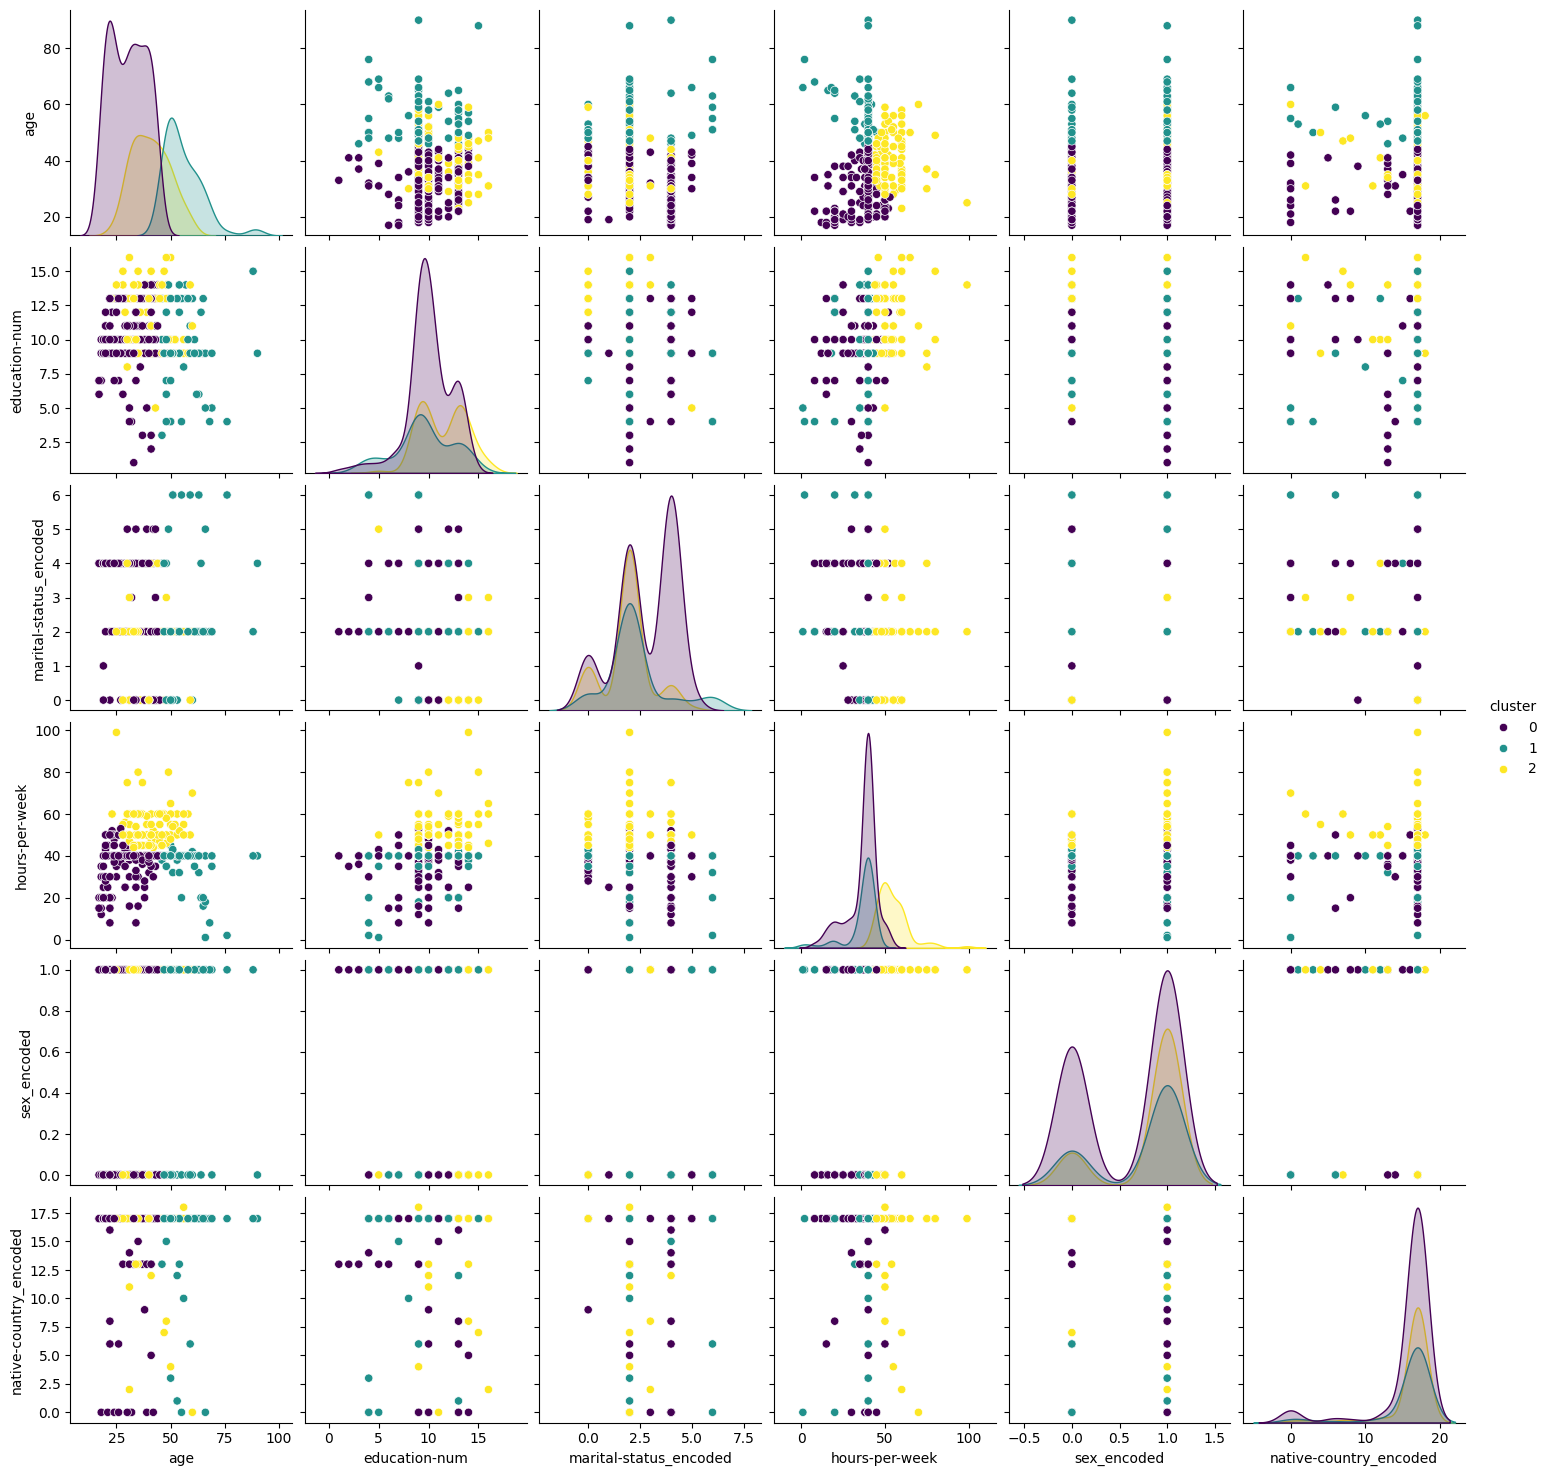

In [2]:
# clustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r"c:\Users\bobbe\OneDrive\Desktop\usb\mydata2.csv")

data['native-country'].fillna('Unknown', inplace=True)
label_encoder = LabelEncoder()
data['marital-status_encoded'] = label_encoder.fit_transform(data['marital-status'])
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['native-country_encoded'] = label_encoder.fit_transform(data['native-country'])
data['agrossincome_encoded'] = label_encoder.fit_transform(data['agrossincome'])

X = data[['age', 'education-num', 'marital-status_encoded', 'sex_encoded', 'hours-per-week', 'native-country_encoded']]

n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

clusters = cluster.fit_predict(X)

data['cluster'] = clusters

#distribution of clusters
print("Cluster Distribution:")
print(data['cluster'].value_counts())

sns.pairplot(data=data, hue='cluster', vars=['age', 'education-num', 'marital-status_encoded', 'hours-per-week', 'sex_encoded', 'native-country_encoded'], palette='viridis')
plt.show()